# Inspirational Graph #

I have decided to emulate the graphs given at https://www.inverse.com/article/18272-4-pokemon-go-graphs-that-show-just-how-big-the-game-is. This link was given in the critiques.pdf in the 02-classwork.zip foder.

## The Epochal Phenomenon of Pokeman Go ##

Pokeman Go is all over the news for all the right reasons. For the first time in the history, a digital game has been designed to let down the couch potatoes out there. In order to play, they ought to go out and run around to catch them all ! Nevertheless, those lazy game enthusiasts seem to be metamorphosed into fitness freaks- thanks to the game that took the world by strom within a week of its launch. People are leaving their comfort of their couch to venture out on to the open to chase the rare Pokemon species!

In the past one week, all the social media feeds,from my friends, pages I subscribe to, and news, were about the legendary phenomenon of Pokemon Go. I am neither an app nor a gaming enthusiast. It's not surprising that someone naturally becomes curious when the entire world begins to talk about something unprecedented.So I set out to grab dataset from all the available sources, such as Google trends, Github. In addition to emulating the graphs from a link given in the critique.pdf, I have tried to discover the fluctuations in interest rate for your favourite apps: Whatsapp, Facebook, Tinder, and now Pokemon Go. Google trends has provided me with rich data sets of download trends from different countries: US, UK, France, Spain, Brazil, Japan etc. Pokemon Go is phenomenal, but public interest in Whatsapp hasn't been faded down yet ! Towards the end of the first week of its launch, you would see Pokemon Go's download is dwindling in several countries.

I picked up four search terms to discover the search trend over the past one year: trump, clinton, Islamic State, Game of Thrones, and Pokemon Go. The graph shows that clinton isn't a favourite search term as compared to the rest in the list. Search for Islamic State is at its peak when a mishap occurs in any of the corner of the world. Whereas, number of hit for Pokomon Go is all time high after it's launch and is uncomparable as far as other search terms are concerned.

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser
import math
import random
import matplotlib.ticker as plticker
import matplotlib.dates as mdates


matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
df_pokemon= pd.read_csv("pageviews_uniques_by_login_state_by_day-pokemon.csv")
df_pokemon.head()

,date,logged_out_uniques,logged_in_unique,uniques,logged_in_pageviews,logged_out_pageviews,pageviews
0,2016-07-05,21616,6367,27983,114386,101261,215647
1,2016-07-06,123986,45021,169007,586145,556056,1142201
2,2016-07-07,567521,164814,732335,3001319,2701737,5703056
3,2016-07-08,907632,292469,1200101,5252038,4540216,9792254
4,2016-07-09,998913,341397,1340310,6169657,5342766,11512423


In [ ]:
#formatter = mdates.DateFormatter('%d%m%Y')

In [4]:
def parse_date(str_date):
    return dateutil.parser.parse(str_date)

df_pokemon['DATE'] = df_pokemon['date'].apply(parse_date)
print(type(df_pokemon["DATE"][0]))
df_pokemon["DATE"][0]

<class 'pandas.tslib.Timestamp'>


Timestamp('2016-07-05 00:00:00')

In [ ]:
#df_pokemon['DATE1'] = df_pokemon['DATE'].apply(to_datetime)

In [5]:
df_pokemon['DATE'][1].to_datetime()


datetime.datetime(2016, 7, 6, 0, 0)

In [6]:
df_pokemon['DATE1'] = [item.to_datetime() for item in df_pokemon['DATE']]


In [7]:
df_pokemon.index = df_pokemon['DATE']
df_pokemon.head()

,date,logged_out_uniques,logged_in_unique,uniques,logged_in_pageviews,logged_out_pageviews,pageviews,DATE,DATE1
DATE,,,,,,,,,
2016-07-05,2016-07-05,21616,6367,27983,114386,101261,215647,2016-07-05,2016-07-05
2016-07-06,2016-07-06,123986,45021,169007,586145,556056,1142201,2016-07-06,2016-07-06
2016-07-07,2016-07-07,567521,164814,732335,3001319,2701737,5703056,2016-07-07,2016-07-07
2016-07-08,2016-07-08,907632,292469,1200101,5252038,4540216,9792254,2016-07-08,2016-07-08
2016-07-09,2016-07-09,998913,341397,1340310,6169657,5342766,11512423,2016-07-09,2016-07-09


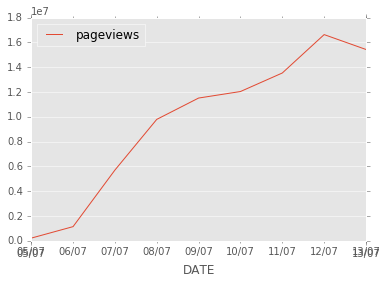

In [8]:
ax= df_pokemon.plot(x='DATE', y='pageviews')
formatter = mdates.DateFormatter('%d/%m')
ax.xaxis.set_minor_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)

In [9]:
df_lol = pd.read_csv("pageviews_uniques_by_login_state_by_day-leagueoflegends.csv")
df_lol.head()

,date,uniques,pageviews
0,2016-07-05,457838,3857802
1,2016-07-06,454353,3842432
2,2016-07-07,438915,3526072
3,2016-07-08,438933,4116300
4,2016-07-09,428820,4421197


In [10]:
df_lol['DATE'] = df_lol['date'].apply(parse_date)
df_lol.head(2)

,date,uniques,pageviews,DATE
0,2016-07-05,457838,3857802,2016-07-05
1,2016-07-06,454353,3842432,2016-07-06


In [ ]:
df_lol.index = df_lol['DATE']
df_lol.head()

In [11]:
df_funny = pd.read_csv("pageviews_uniques_by_login_state_by_day-funny.csv")
df_funny.head()

,date,uniques,pageviews
0,2016-07-05,616061,3474483
1,2016-07-06,595282,3318303
2,2016-07-07,558961,3151922
3,2016-07-08,662015,3354883
4,2016-07-09,487261,2536509


In [12]:
df_funny['DATE'] = df_funny['date'].apply(parse_date)
df_funny.head(2)

,date,uniques,pageviews,DATE
0,2016-07-05,616061,3474483,2016-07-05
1,2016-07-06,595282,3318303,2016-07-06


In [ ]:
df_funny.index = df_funny['DATE']
df_funny.head()

In [13]:
df_ask = pd.read_csv("pageviews_uniques_by_login_state_by_day-askreddit.csv")
df_ask.tail()

,date,uniques,pageviews
4,2016-07-09,905424,3600522
5,2016-07-10,1024786,4064259
6,2016-07-11,1116338,4590232
7,2016-07-12,1107358,4421094
8,2016-07-13,1220895,4538447


In [14]:
df_ask['DATE'] = df_ask['date'].apply(parse_date)
df_ask.head(2)

,date,uniques,pageviews,DATE
0,2016-07-05,1175796,4753187,2016-07-05
1,2016-07-06,1215845,5000095,2016-07-06


In [ ]:
df_ask.index = df_ask['DATE']
df_ask.head()

trying to emulate https://i.redd.it/xdwtxz1gp29x.png

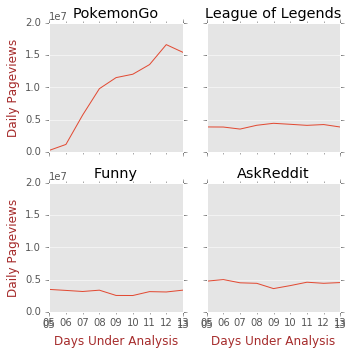

In [19]:
#ax1 = plt.subplot(2, 2, 1)
formatter = mdates.DateFormatter('%d')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(5, 5), sharex=True, sharey=True)

df_pokemon.plot(x='DATE', y='pageviews', label='pokemongo', ax=ax1, legend=False)
ax1.set_title("PokemonGo")
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_minor_formatter(formatter)
ax1.set_xlabel('Days Under Analysis', color='brown')
ax1.set_ylabel('Daily Pageviews', color='brown')
ax1.set_ylim((0, 20000000))
# 1 row, 2 columns, and we'd like the first element.
#ax2 = plt.subplot(2, 2, 2)
df_lol.plot(kind='line', x='DATE', y='pageviews',label='leagueoflegends', ax=ax2, legend=False)
ax2.set_title("League of Legends")
ax2.xaxis.set_major_formatter(formatter)
ax2.xaxis.set_minor_formatter(formatter)
ax2.set_xlabel('Days Under Analysis', color='brown')
ax2.set_ylabel('Daily Pageviews', color='brown')
ax2.set_ylim((0, 20000000))
# 1 row, 2 columns, and we'd like the second element.
#ax1 = plt.subplot(2, 2, 3)
df_funny.plot(kind='line', x='DATE', y='pageviews',label='funny', ax=ax3, legend=False)

ax3.set_title("Funny")
ax3.set_ylim((0, 20000000))
ax3.xaxis.set_major_formatter(formatter)
ax3.xaxis.set_minor_formatter(formatter)
ax3.set_xlabel('Days Under Analysis', color='brown')
ax3.set_ylabel('Daily Pageviews', color='brown')
# 1 row, 2 columns, and we'd like the first element.
#ax2 = plt.subplot(2, 2, 4)
df_ask.plot(kind='line', x='DATE', y='pageviews', label='AskRedit', ax=ax4, legend=False)
ax4.set_title("AskReddit")
ax4.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_minor_formatter(formatter)
ax4.set_xlabel('Days Under Analysis', color='brown')
ax4.set_ylabel('Daily Pageviews', color='brown')
#plt.xticks(rotation='vertical')
#plt.setp(ax4.get_xticklabels(), rotation=70, horizontalalignment='right')
ax4.set_ylim((0, 20000000))
#fig.autofmt_xdate()

plt.savefig("subreddit-small-mult.pdf", transparent=True)
plt.tight_layout()

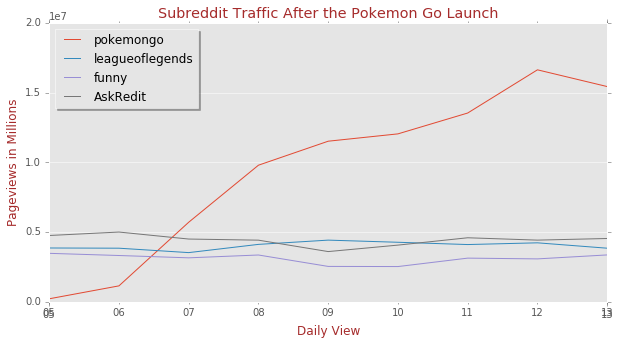

In [39]:
formatter = mdates.DateFormatter('%d')
fig, ax = plt.subplots(figsize=(10,5))
df_pokemon.plot(kind='line', x='DATE', y='pageviews', label='Pokemongo', ax=ax)
df_lol.plot(kind='line', x='DATE', y='pageviews',label='leagueoflegends', ax=ax)
df_funny.plot(kind='line', x='DATE', y='pageviews',label='funny', ax=ax)
df_ask.plot(kind='line', x='DATE', y='pageviews', label='AskRedit',ax=ax)
ax.set_ylim([0, 20000000])

ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_formatter(formatter)
ax.legend(loc='upper left', shadow=True)

ax.set_title("Subreddit Traffic After the Pokemon Go Launch", color='brown')
ax.set_xlabel('Daily View', color='brown')
ax.set_ylabel('Pageviews in Millions', color='brown')
plt.savefig("subreddit.pdf", transparent=True, color='brown')
plt.savefig("subreddit.png", transparent=True)


In [33]:
df_google= pd.read_csv("google_report.csv")
df_google.head()

,Week,Pokémon Go,trump,Game of Thrones,clinton,Islamic State of Iraq and the Levant
0,2015-07-26,0,2,3,1,3
1,2015-08-02,0,4,3,1,2
2,2015-08-09,0,4,3,1,3
3,2015-08-16,0,4,2,2,2
4,2015-08-23,0,5,2,1,2


In [34]:
def parse_date(str_date):
    return dateutil.parser.parse(str_date)

df_google['WEEK'] = df_google['Week'].apply(parse_date)

In [35]:

print(type(df_google["WEEK"][0]))
df_google["WEEK"][0]

<class 'pandas.tslib.Timestamp'>


Timestamp('2015-07-26 00:00:00')

In [36]:
df_google.head()

,Week,Pokémon Go,trump,Game of Thrones,clinton,Islamic State of Iraq and the Levant,WEEK
0,2015-07-26,0,2,3,1,3,2015-07-26
1,2015-08-02,0,4,3,1,2,2015-08-02
2,2015-08-09,0,4,3,1,3,2015-08-09
3,2015-08-16,0,4,2,2,2,2015-08-16
4,2015-08-23,0,5,2,1,2,2015-08-23


from https://www.inverse.com/article/18272-4-pokemon-go-graphs-that-show-just-how-big-the-game-is

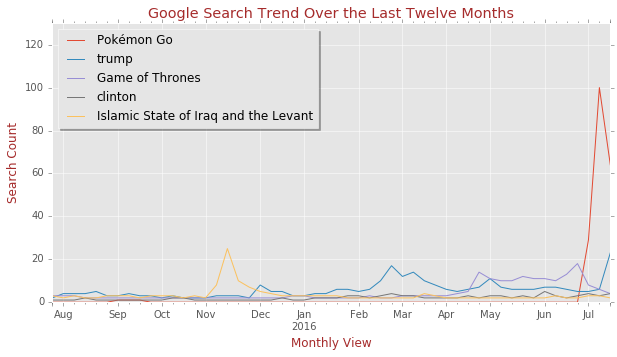

In [48]:
fig, ax = plt.subplots(figsize=(10,5))
df_google.plot(kind='line', x='WEEK', ax=ax)
ax.set_ylim([0, 130])

ax.legend(loc='upper left', shadow=True)

ax.set_title("Google Search Trend Over the Last Twelve Months", color='brown')
ax.set_xlabel('Monthly View', color='brown')
ax.set_ylabel('Search Count', color='brown')
#ax.annotate(s="Paris Attack", xy=(45,20),color='darkred')
plt.savefig("google_trend.pdf", transparent=True)
plt.savefig("google_trend.png", transparent=True)

In [46]:
df_app= pd.read_csv("report-apps.csv")
df_app.head()

,Week,Pokémon Go,WhatsApp,Facebook,Tinder
0,2015-07-26,0,45,54,0
1,2015-08-02,0,75,48,0
2,2015-08-09,0,53,50,0
3,2015-08-16,0,58,63,0
4,2015-08-23,0,56,67,8


In [47]:
def parse_date(str_date):
    return dateutil.parser.parse(str_date)

df_app['WEEK'] = df_app['Week'].apply(parse_date)

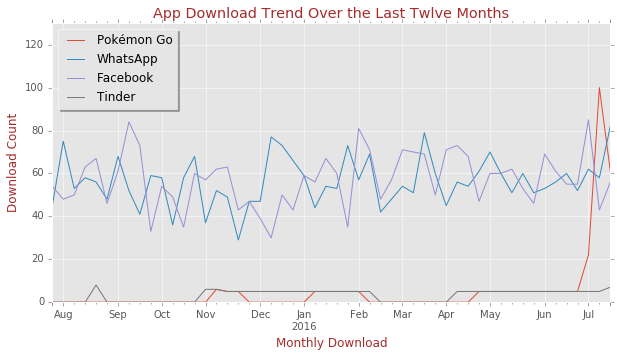

In [51]:
fig, ax = plt.subplots(figsize=(10,5))
df_app.plot(kind='line', x='WEEK',ax=ax)
ax.set_ylim([0, 130])

ax.legend(loc='upper left', shadow=True)

ax.set_title("App Download Trend Over the Last Twlve Months", color='brown')
ax.set_xlabel('Monthly Download', color='brown')
ax.set_ylabel('Download Count', color='brown')

                                         
      
plt.savefig("app_trend.png", transparent=True)
plt.savefig("app_trend.pdf", transparent=True)

In [52]:
df_app_percent= pd.read_csv("report-apps-interest.csv")
df_app_percent.head()

,Week,Tinder,Pokémon Go,WhatsApp,Facebook
0,2015-07-26,0,0,0,0
1,2015-08-02,0,0,67,-12
2,2015-08-09,0,0,16,-9
3,2015-08-16,0,0,27,16
4,2015-08-23,0,0,24,23


In [53]:
def parse_date(str_date):
    return dateutil.parser.parse(str_date)

df_app_percent['WEEK'] = df_app_percent['Week'].apply(parse_date)

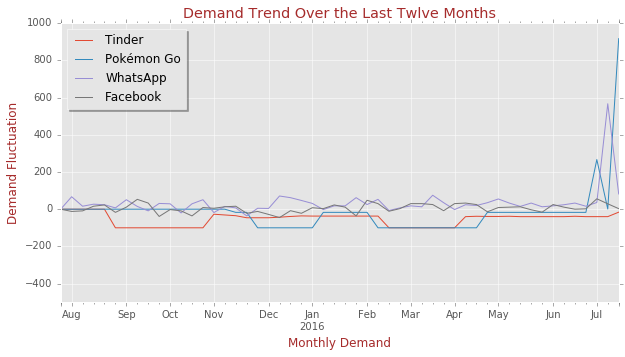

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
df_app_percent.plot(kind='line', x='WEEK',ax=ax)
ax.set_ylim([-500, 1000])

ax.legend(loc='upper left', shadow=True)

ax.set_title("Demand Trend Over the Last Twlve Months", color='brown')
ax.set_xlabel('Monthly Demand', color='brown')
ax.set_ylabel('Demand Fluctuation', color='brown')

                                         
      

plt.savefig("app_trend.pdf", transparent=True)

In [58]:
df_pm= pd.read_csv("pokemon-world.csv")
df_pm.head()

,Country,Total Download
0,Brazil,258
1,United States,63
2,United Kingdom,311
3,Spain,100
4,Japan,168


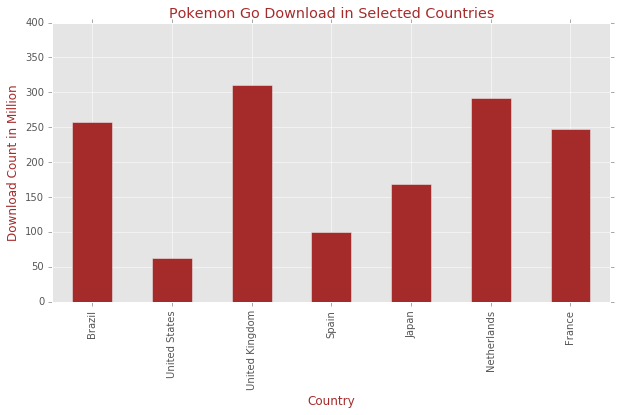

In [60]:
fig, ax = plt.subplots(figsize=(10,5))
df_pm.plot(kind='bar', x='Country', color='brown' ,legend=False,ax=ax)
ax.set_ylim([0, 400])



ax.set_title("Pokemon Go Download in Selected Countries", color='brown')
ax.set_xlabel('Country', color='brown')
ax.set_ylabel('Download Count in Million', color='brown')

                                         
      

plt.savefig("pokemon_trend.pdf", transparent=True)

In [61]:
df_game = pd.read_csv("games-report.csv")
df_game.tail()

,Week,Pokémon Go,Candy Crush Saga,Nintendo Entertainment System,Angry Birds,Transistor
339,2016-07-03,29,15.0,5.0,13.0,0.0
340,2016-07-10,100,15.0,15.0,12.0,0.0
341,2016-07-17,66,13.0,9.0,9.0,0.0
342,2016-07-24,51,18.0,10.0,13.0,0.0
343,NaN,,NaN,NaN,NaN,NaN


In [65]:
df_game= df_game.drop([343])

In [66]:
df_game['Pokémon Go']= df_game['Pokémon Go'].astype(int)

In [67]:
df_game.tail()

,Week,Pokémon Go,Candy Crush Saga,Nintendo Entertainment System,Angry Birds,Transistor
338,2016-06-26,0,15.0,5.0,14.0,0.0
339,2016-07-03,29,15.0,5.0,13.0,0.0
340,2016-07-10,100,15.0,15.0,12.0,0.0
341,2016-07-17,66,13.0,9.0,9.0,0.0
342,2016-07-24,51,18.0,10.0,13.0,0.0


In [68]:
def parse_date(str_date):
    return dateutil.parser.parse(str_date)

df_game['WEEK'] = df_game['Week'].apply(parse_date)
df_game.tail(7)

,Week,Pokémon Go,Candy Crush Saga,Nintendo Entertainment System,Angry Birds,Transistor,WEEK
336,2016-06-12,0,15.0,5.0,18.0,0.0,2016-06-12
337,2016-06-19,0,15.0,5.0,15.0,0.0,2016-06-19
338,2016-06-26,0,15.0,5.0,14.0,0.0,2016-06-26
339,2016-07-03,29,15.0,5.0,13.0,0.0,2016-07-03
340,2016-07-10,100,15.0,15.0,12.0,0.0,2016-07-10
341,2016-07-17,66,13.0,9.0,9.0,0.0,2016-07-17
342,2016-07-24,51,18.0,10.0,13.0,0.0,2016-07-24


In [ ]:
df_game.info()

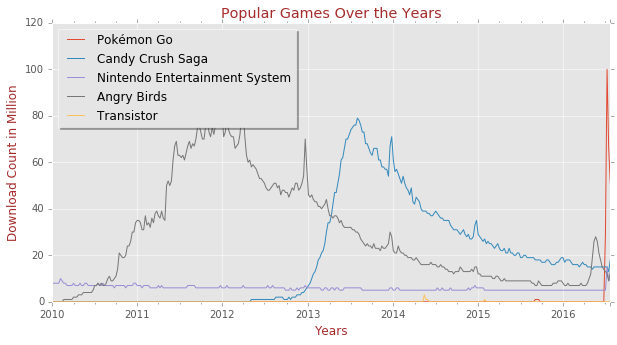

In [71]:
fig, ax = plt.subplots(figsize=(10,5))
df_game.plot(kind='line', x='WEEK',ax=ax)

ax.set_ylim([0, 120])


ax.set_title("Popular Games Over the Years", color='brown')
ax.set_xlabel('Years', color='brown')
ax.set_ylabel('Download Count in Million', color='brown')

                                         
ax.legend(loc='upper left', shadow=True)

plt.savefig("game_trend.png", transparent=True)
plt.savefig("game_trend.pdf", transparent=True)